# Text difficulty prediction

Using WCPM, accuracy, comprehension

In [7]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from collections import defaultdict

In [2]:
# df = pd.read_csv('table_for_prediction.csv')

In [3]:
# df['Acc4'] = df.Acc.apply(lambda x: x ** 4)

Span

In [4]:
# session_to_span_proportions = defaultdict(list)
# PERF_MAT_DIR = '../output/performance-matrix/all/'
# for path in [p for p in os.listdir(PERF_MAT_DIR) if '184' in p]:
#     full_path = os.path.join(PERF_MAT_DIR, path)
#     for matrix_path in os.listdir(full_path):
#         session = matrix_path.replace('.tsv', '')
#         matrix_full_path = os.path.join(full_path, matrix_path)
#         matrix = pd.read_csv(matrix_full_path, sep='\t')
#         spanned_tokens = list(matrix.token[1:-1])
#         full_length = len(spanned_tokens)
# #         print(matrix_full_path)
#         while spanned_tokens[0] != spanned_tokens[0]:
#             spanned_tokens = spanned_tokens[1:]
#             if not spanned_tokens:
#                 break
#         if spanned_tokens:
#             while spanned_tokens[-1] != spanned_tokens[-1]:
#                 spanned_tokens = spanned_tokens[:-1]
#                 if not spanned_tokens:
#                     break
#         trimmed_length = len(spanned_tokens)
#         span_proportion = trimmed_length / full_length
#         session_to_span_proportions[session].append(span_proportion)
# df['AvgSpan'] = df.Session.apply(lambda x: np.mean(np.array(session_to_span_proportions[str(x)]) ** 4))
# df.to_csv('table_for_prediction_updated.csv', index=None)

In [5]:
df = pd.read_csv('table_for_prediction_updated.csv')

In [15]:
for (x, y) in itertools.combinations(['WCPM', 'Comp', 'Acc4', 'AvgSpan'], 2):
    print(x, y)
    print('   Overall r = {:.2f}'.format(df[x].corr(df[y])))
    for grade in ['Grade1', 'Grade2', 'Grade3', 'Grade4']:
        grade_df = df.loc[df.Grade == grade]
        print('   {} r = {:.3f}'.format(grade, grade_df[x].corr(grade_df[y])))

WCPM Comp
   Overall r = 0.39
   Grade1 r = 0.393
   Grade2 r = 0.485
   Grade3 r = 0.392
   Grade4 r = 0.442
WCPM Acc4
   Overall r = 0.62
   Grade1 r = 0.651
   Grade2 r = 0.619
   Grade3 r = 0.458
   Grade4 r = 0.551
WCPM AvgSpan
   Overall r = 0.63
   Grade1 r = 0.675
   Grade2 r = 0.622
   Grade3 r = 0.471
   Grade4 r = 0.539
Comp Acc4
   Overall r = 0.50
   Grade1 r = 0.508
   Grade2 r = 0.595
   Grade3 r = 0.562
   Grade4 r = 0.444
Comp AvgSpan
   Overall r = 0.40
   Grade1 r = 0.393
   Grade2 r = 0.485
   Grade3 r = 0.479
   Grade4 r = 0.338
Acc4 AvgSpan
   Overall r = 0.62
   Grade1 r = 0.651
   Grade2 r = 0.572
   Grade3 r = 0.524
   Grade4 r = 0.554


"Spread out" accuracy

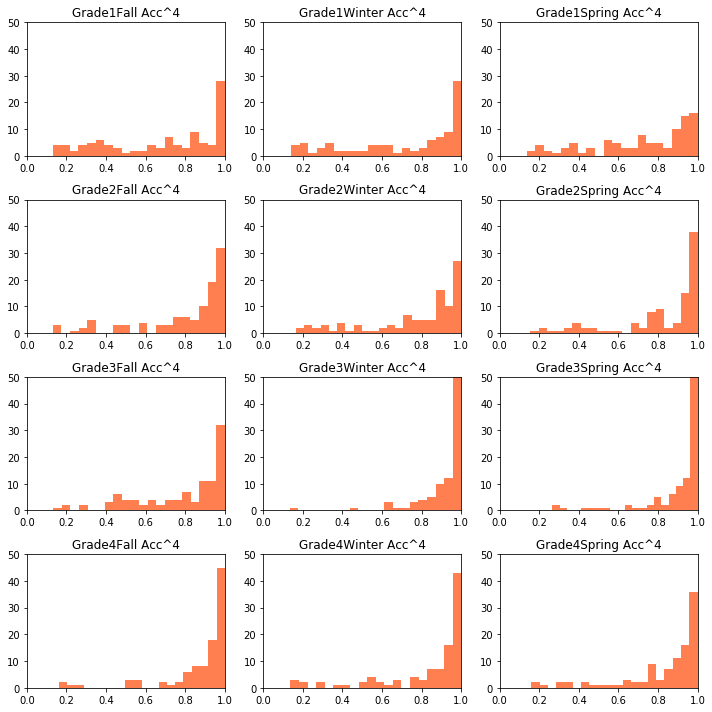

In [19]:
fig, ax =  plt.subplots(4, 3)
fig.set_figheight(10)
fig.set_figwidth(10)

for grade_idx, grade in enumerate(['Grade1', 'Grade2', 'Grade3', 'Grade4']):
    for term_idx, term in enumerate(['Fall', 'Winter', 'Spring']):
        form = grade + term
        accs = np.array(df.loc[df.Form == form].Acc4)
        
        ax[grade_idx][term_idx].hist(accs, bins=20, color='coral')
        ax[grade_idx][term_idx].set_title(form + ' Acc^4')
        ax[grade_idx][term_idx].set_xlim(0, 1)
        ax[grade_idx][term_idx].set_ylim(0, 50)
plt.tight_layout()
#     break

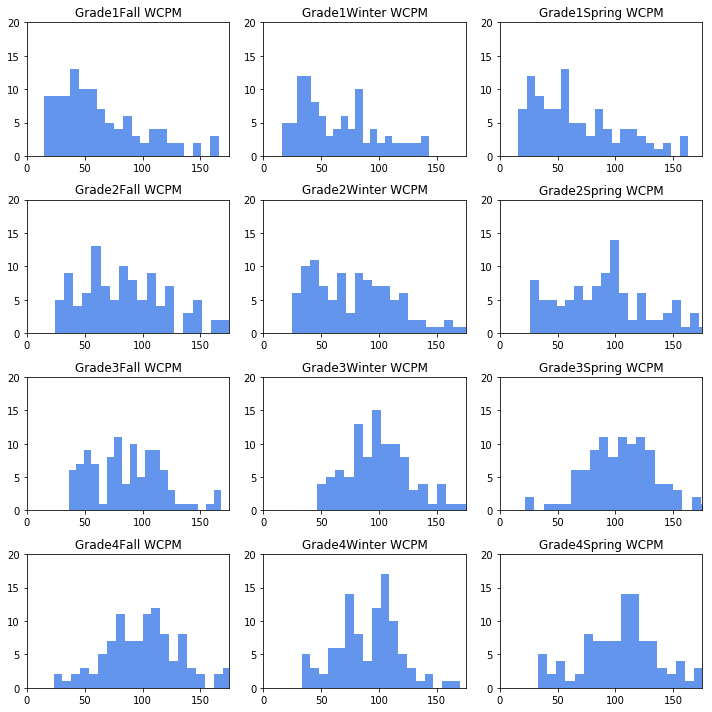

In [20]:
fig, ax =  plt.subplots(4, 3)
fig.set_figheight(10)
fig.set_figwidth(10)

for grade_idx, grade in enumerate(['Grade1', 'Grade2', 'Grade3', 'Grade4']):
    for term_idx, term in enumerate(['Fall', 'Winter', 'Spring']):
        form = grade + term
        wcpm = np.array(df.loc[df.Form == form].WCPM)
        
        ax[grade_idx][term_idx].hist(wcpm, bins=20, color='cornflowerblue')
        ax[grade_idx][term_idx].set_title(form + ' WCPM')
        ax[grade_idx][term_idx].set_xlim(0, 175)
        ax[grade_idx][term_idx].set_ylim(0, 20)
plt.tight_layout()
#     break

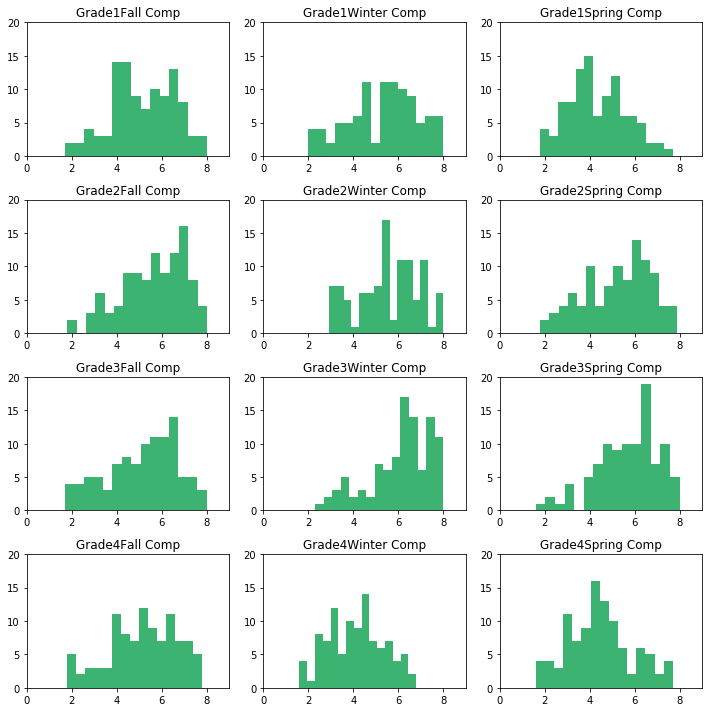

In [21]:
fig, ax =  plt.subplots(4, 3)
fig.set_figheight(10)
fig.set_figwidth(10)

for grade_idx, grade in enumerate(['Grade1', 'Grade2', 'Grade3', 'Grade4']):
    for term_idx, term in enumerate(['Fall', 'Winter', 'Spring']):
        form = grade + term
        comp = np.array(df.loc[df.Form == form].Comp)
        
        ax[grade_idx][term_idx].hist(comp, bins=15, color='mediumseagreen')
        ax[grade_idx][term_idx].set_title(form + ' Comp')
        ax[grade_idx][term_idx].set_xlim(0, 9)
        ax[grade_idx][term_idx].set_ylim(0, 20)
plt.tight_layout()
#     break

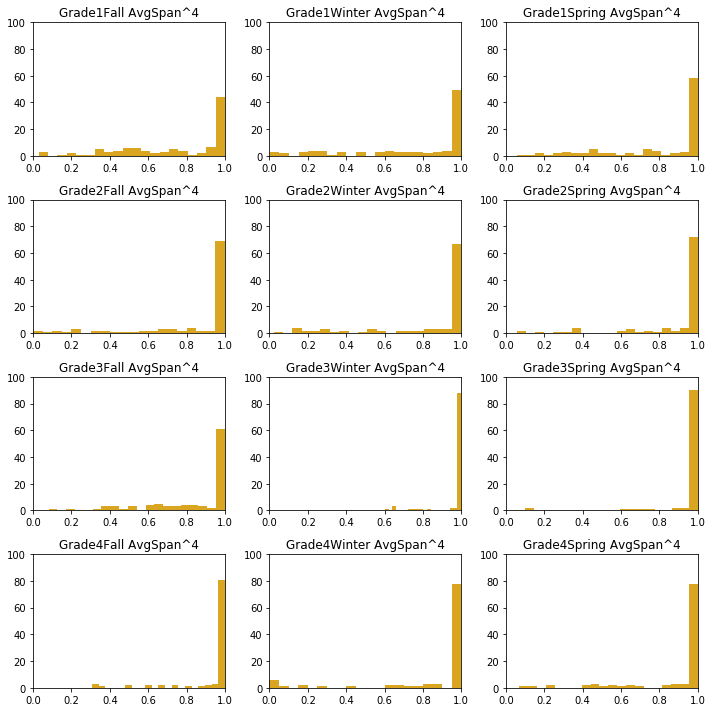

In [23]:
fig, ax =  plt.subplots(4, 3)
fig.set_figheight(10)
fig.set_figwidth(10)

for grade_idx, grade in enumerate(['Grade1', 'Grade2', 'Grade3', 'Grade4']):
    for term_idx, term in enumerate(['Fall', 'Winter', 'Spring']):
        form = grade + term
        accs = np.array(df.loc[df.Form == form].AvgSpan)
        accs = np.array([x if x == x else 0 for x in accs])
        ax[grade_idx][term_idx].hist(accs, bins=20, color='goldenrod')
        ax[grade_idx][term_idx].set_title(form + ' AvgSpan^4')
        ax[grade_idx][term_idx].set_xlim(0, 1)
        ax[grade_idx][term_idx].set_ylim(0, 100)
plt.tight_layout()
#     break

In [24]:
def plot_two_features_all_sessions(feature_1, feature_2):
    plt.figure(figsize=(8, 8))
    for gyor_numeric_value, gyor_color, gyor_marker in zip(
        [3, 2, 1, 0], 
        ['lightgreen', 'gold', 'darkorange', 'firebrick'], 
        ['+', 's', 'v', 'x']):
        df_selected = df.loc[df.gyorJ == gyor_numeric_value]
        feature_1_column = df_selected[feature_1]
        feature_2_column = df_selected[feature_2]
        plt.title(feature_1 + ', ' + feature_2 + ', all sessions')
        plt.xlabel(feature_1)
        plt.ylabel(feature_2)
        plt.scatter(
            feature_1_column,
            feature_2_column,
            color=gyor_color,
            marker=gyor_marker,
            alpha=.5,
            label=gyor_numeric_value
        )
        print(gyor_numeric_value, len(feature_1_column))
    print('n =', df.shape[0])
    plt.legend()

3 768
2 191
1 98
0 158
n = 1215


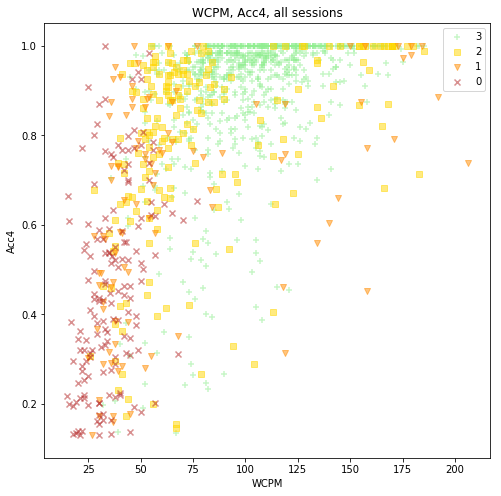

In [25]:
plot_two_features_all_sessions('WCPM', 'Acc4')

3 768
2 191
1 98
0 158
n = 1215


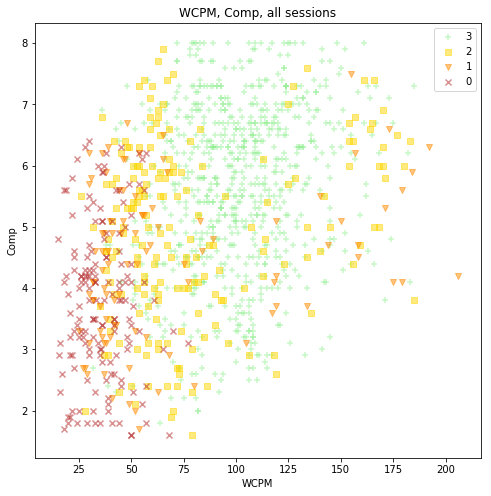

In [26]:
plot_two_features_all_sessions('WCPM', 'Comp')

3 768
2 191
1 98
0 158
n = 1215


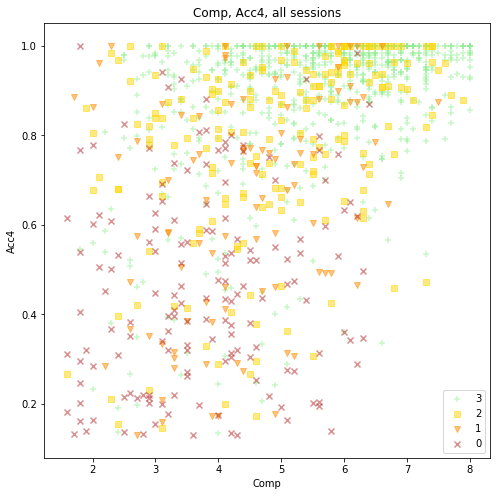

In [27]:
plot_two_features_all_sessions('Comp', 'Acc4')

3 768
2 191
1 98
0 158
n = 1215


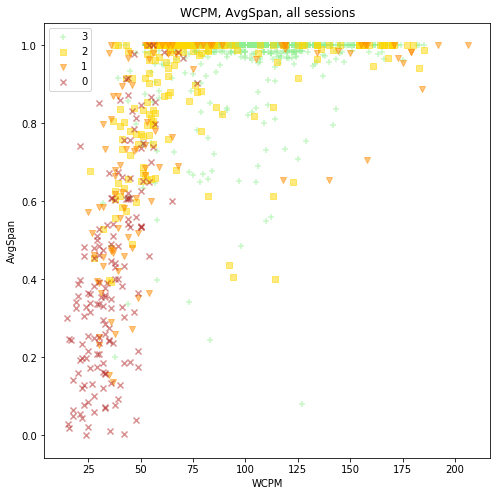

In [28]:
plot_two_features_all_sessions('WCPM', 'AvgSpan')

In [29]:
def plot_two_features_by_grade(feature_1, feature_2):
    fig, ax = plt.subplots(1, 4)
    fig.set_figwidth(20)
    for grade_idx, grade in enumerate(['Grade1', 'Grade2', 'Grade3', 'Grade4']):
#         plt.figure(figsize=(8, 8))
        for gyor_numeric_value, gyor_color, gyor_marker in zip(
        [3, 2, 1, 0], 
        ['lightgreen', 'gold', 'darkorange', 'firebrick'], 
        ['+', 's', 'v', 'x']):
            df_selected = df.loc[df.Grade == grade]
            if gyor_numeric_value == 3:
                print(df_selected.shape[0])
            df_selected = df_selected.loc[df_selected.gyorJ == gyor_numeric_value]
            print(grade, gyor_numeric_value, df_selected.shape[0])
            feature_1_column = df_selected[feature_1]
            feature_2_column = df_selected[feature_2]
            ax[grade_idx].set_title(feature_1 + ', ' + feature_2 + ', ' + grade)
            ax[grade_idx].set_xlabel(feature_1)
            ax[grade_idx].set_ylabel(feature_2)
            ax[grade_idx].scatter(
                feature_1_column,
                feature_2_column,
                color=gyor_color,
                marker=gyor_marker,
                alpha=.5,
                label=gyor_numeric_value
            )
    plt.legend()
    plt.show()

301
Grade1 3 154
Grade1 2 44
Grade1 1 44
Grade1 0 59
308
Grade2 3 179
Grade2 2 64
Grade2 1 18
Grade2 0 47
303
Grade3 3 230
Grade3 2 36
Grade3 1 14
Grade3 0 23
303
Grade4 3 205
Grade4 2 47
Grade4 1 22
Grade4 0 29


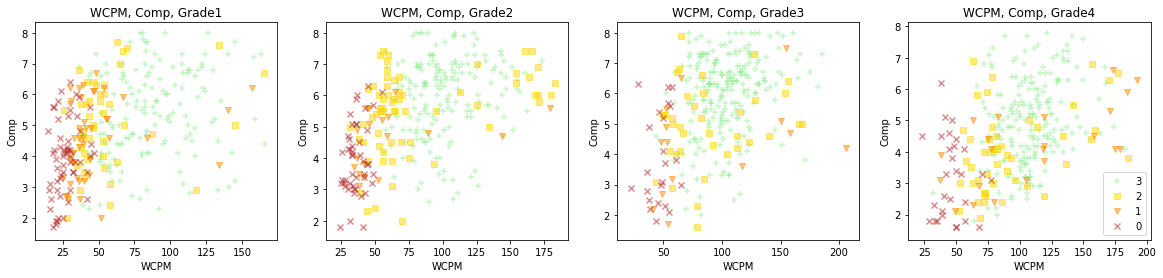

301
Grade1 3 154
Grade1 2 44
Grade1 1 44
Grade1 0 59
308
Grade2 3 179
Grade2 2 64
Grade2 1 18
Grade2 0 47
303
Grade3 3 230
Grade3 2 36
Grade3 1 14
Grade3 0 23
303
Grade4 3 205
Grade4 2 47
Grade4 1 22
Grade4 0 29


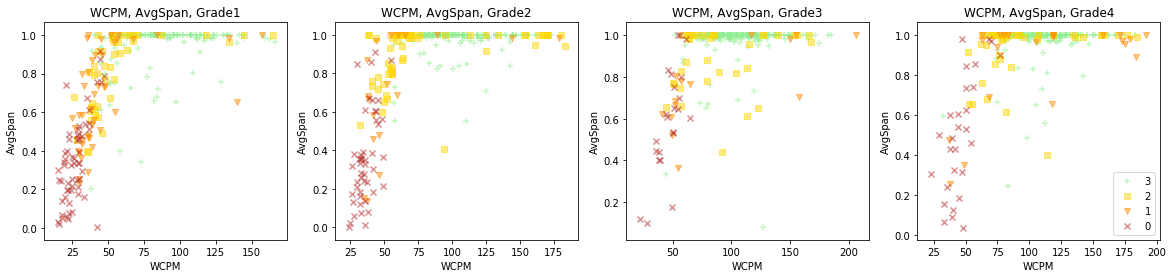

301
Grade1 3 154
Grade1 2 44
Grade1 1 44
Grade1 0 59
308
Grade2 3 179
Grade2 2 64
Grade2 1 18
Grade2 0 47
303
Grade3 3 230
Grade3 2 36
Grade3 1 14
Grade3 0 23
303
Grade4 3 205
Grade4 2 47
Grade4 1 22
Grade4 0 29


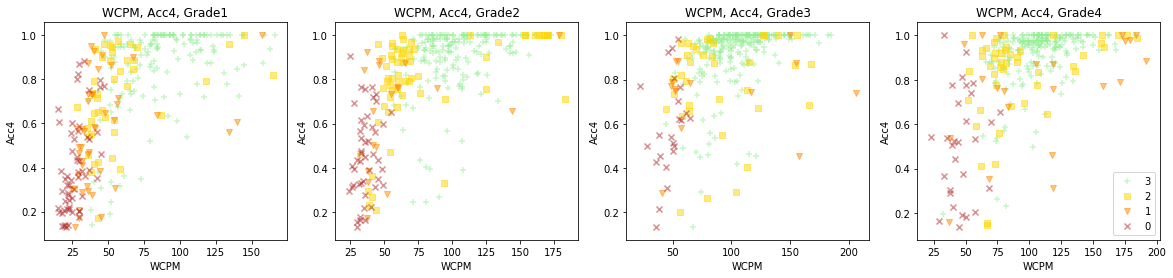

301
Grade1 3 154
Grade1 2 44
Grade1 1 44
Grade1 0 59
308
Grade2 3 179
Grade2 2 64
Grade2 1 18
Grade2 0 47
303
Grade3 3 230
Grade3 2 36
Grade3 1 14
Grade3 0 23
303
Grade4 3 205
Grade4 2 47
Grade4 1 22
Grade4 0 29


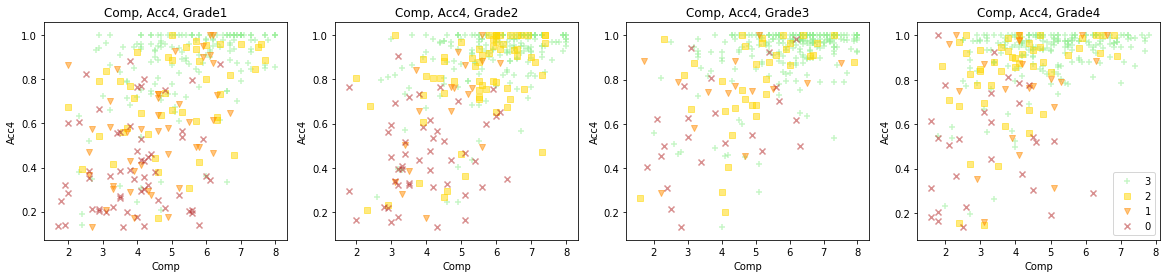

In [30]:
plot_two_features_by_grade('WCPM', 'Comp')
plot_two_features_by_grade('WCPM', 'AvgSpan')
plot_two_features_by_grade('WCPM', 'Acc4')
plot_two_features_by_grade('Comp', 'Acc4')